In [1]:
import qmlvcml
# import pandas as pd
# # testing
# banana_df = pd.read_csv('data/banana_quality.csv')
# print(banana_df.head())
# banana_df_y = banana_df['Quality']
# banana_df_X = banana_df.drop('Quality', axis=1)
banana_df_X, banana_df_y = qmlvcml.load_banana_data()

/home/driffyn/anaconda3/envs/phys4684/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  


Plotting the data


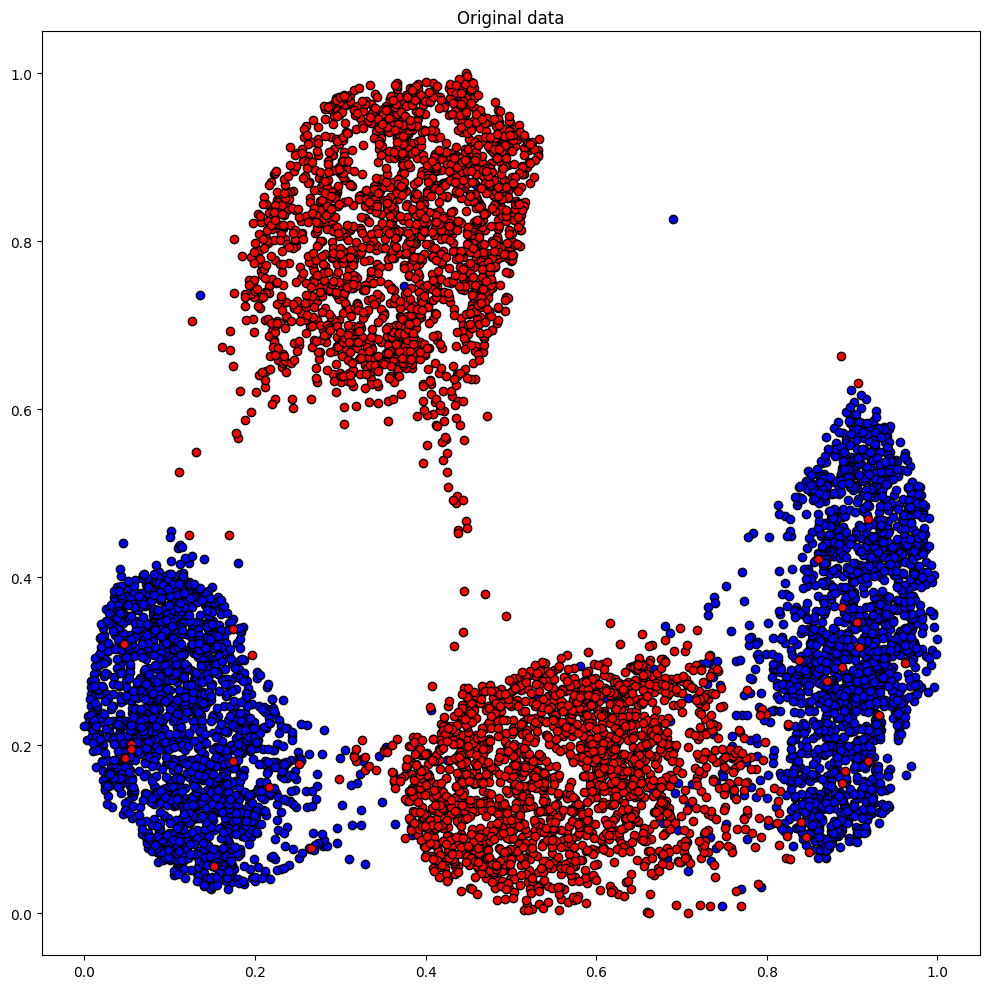

Plotting the padded and normalised data


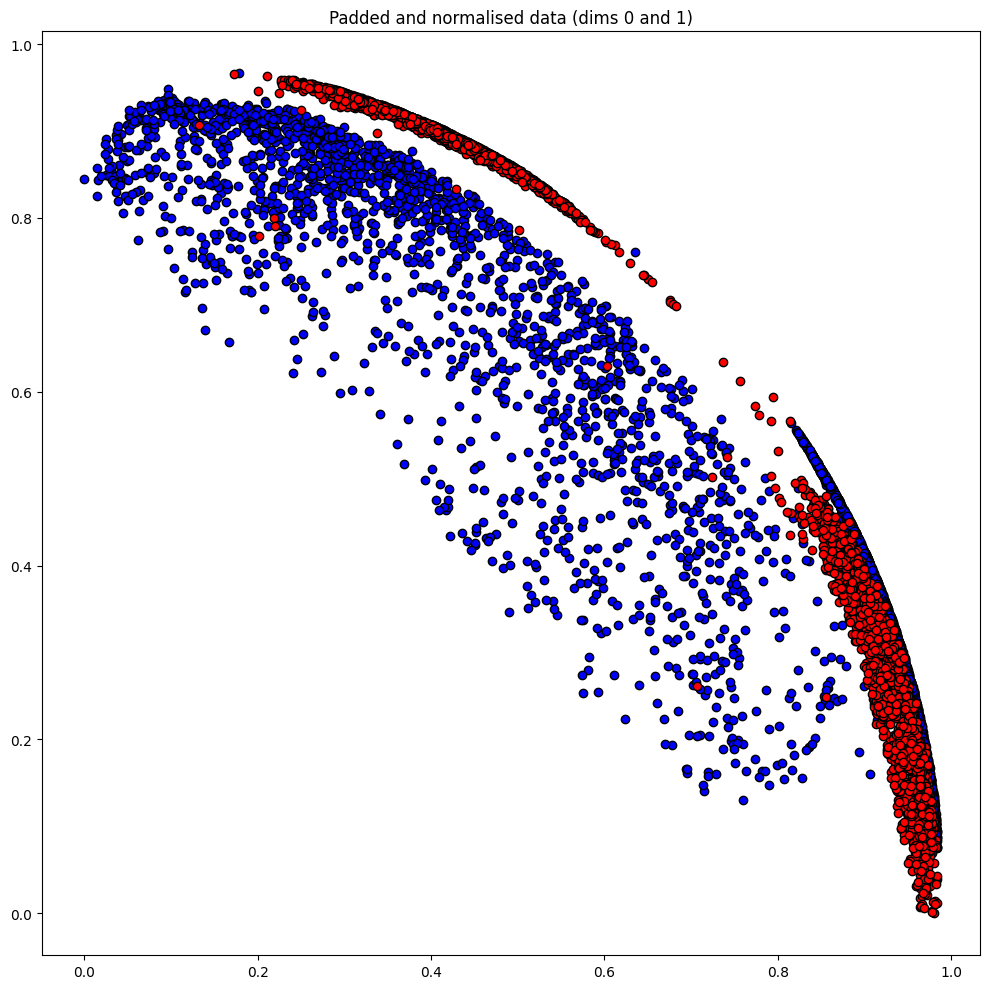

Plotting the feature vectors


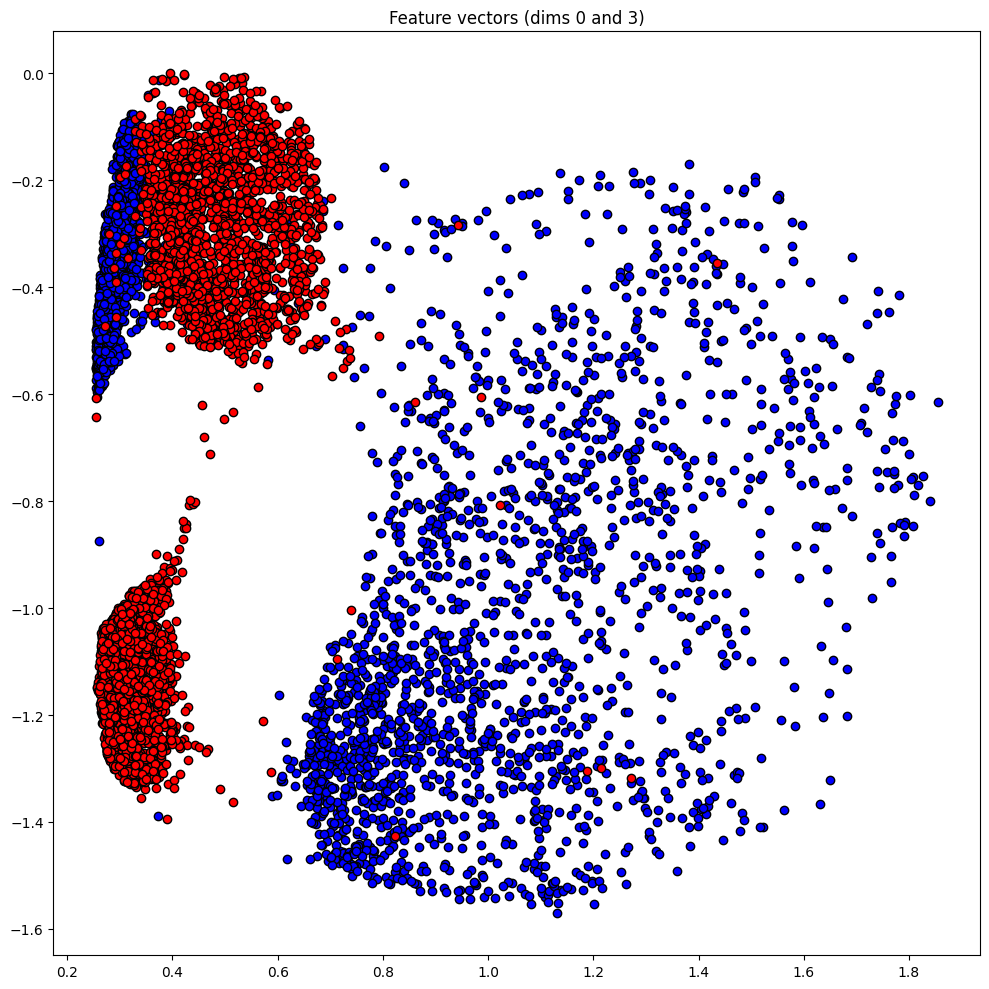

Best accuracy: 0.7109375
Final weights: [[[ 5.60215406e+00 -3.17192488e+01  1.07353164e+01]
  [-8.69308282e+00 -2.77274116e+00 -1.34377962e+01]]

 [[ 1.07472173e+01  2.12731927e+01  5.75414182e+00]
  [-7.69113269e+00 -5.90036713e+00 -4.38947527e-01]]

 [[ 5.77133207e+00 -1.96562352e+01  1.78591271e+01]
  [-6.13139134e+00  1.02439477e-01  1.93680647e+01]]

 [[ 1.78520526e+01 -1.95572102e-01  2.91344808e+00]
  [ 4.30354383e+00  1.26688417e+01  2.20818956e+00]]

 [[ 2.90227291e+00 -7.37974586e+00 -1.45315373e-02]
  [-3.72748552e-04  5.27051606e-03 -9.94832876e-05]]]
Final bias: 0.4230528383527918
Final predictions: [ 1.  1. -1. ...  1.  1.  1.]


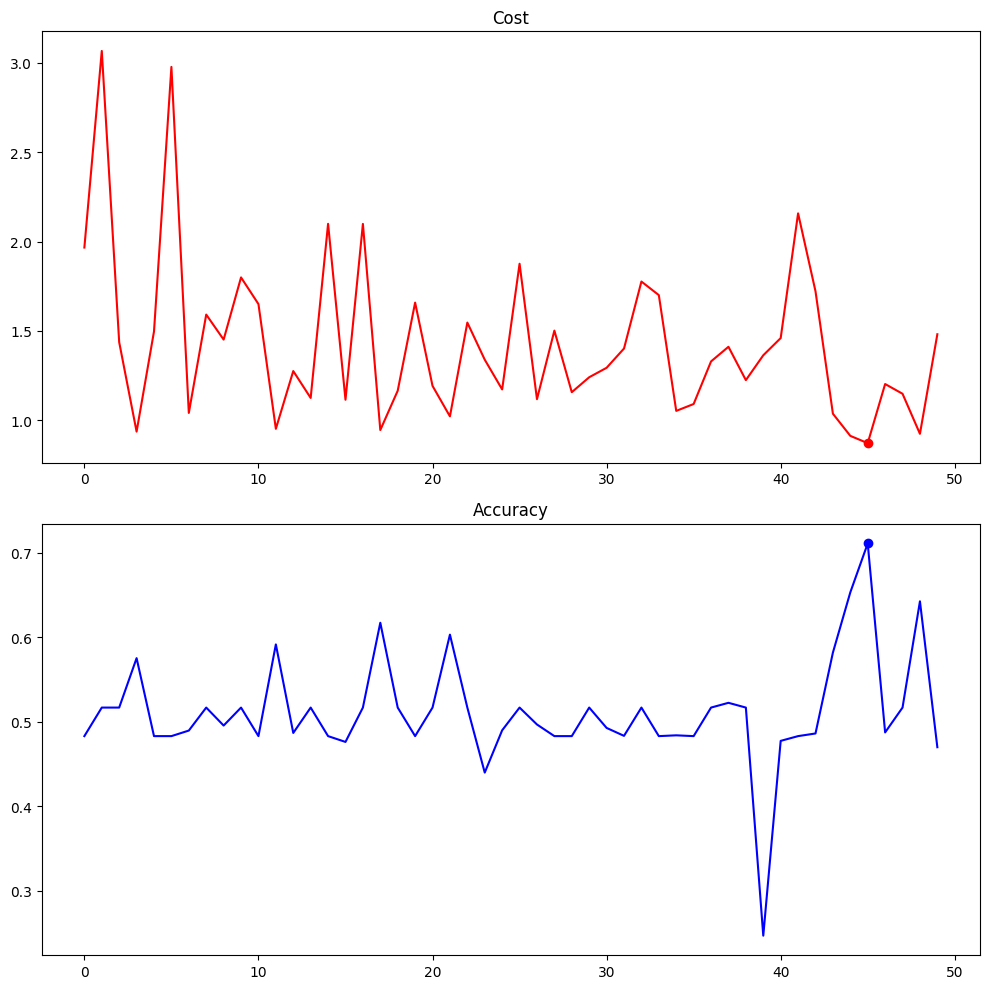

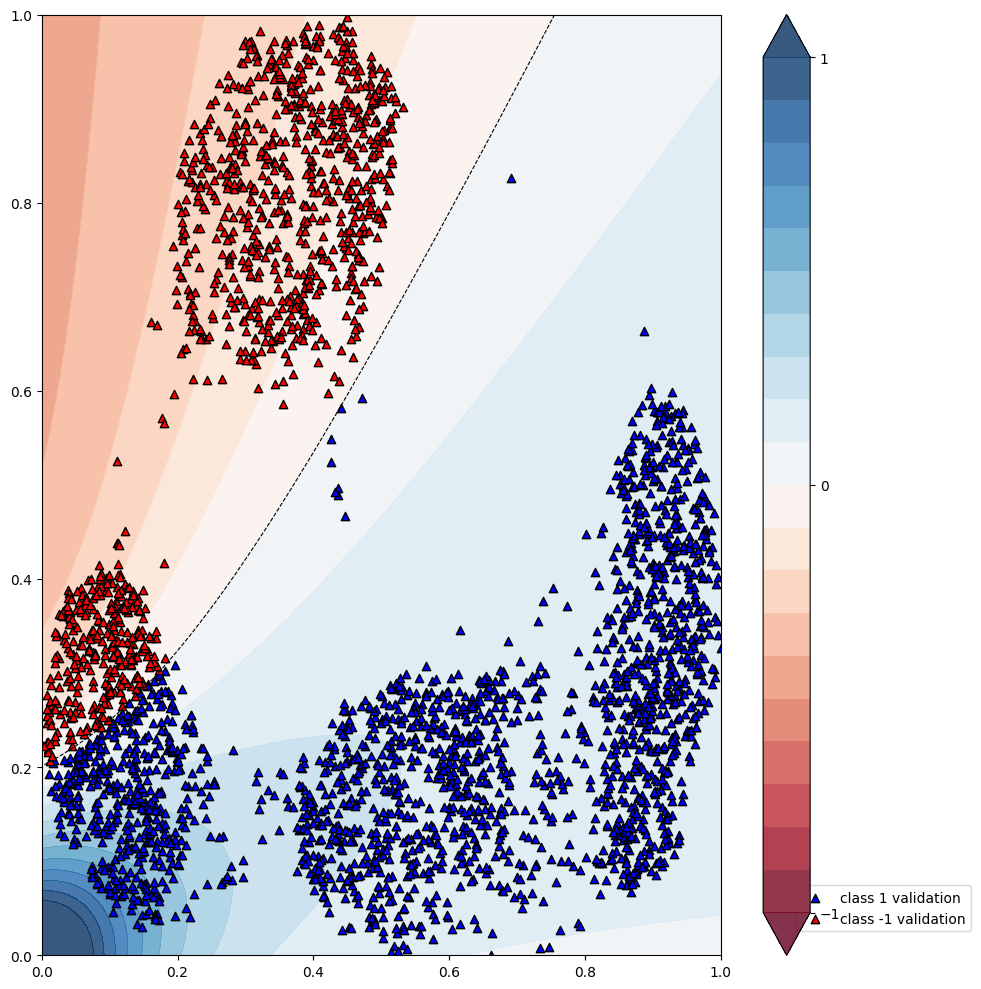

Plotting the confusion matrix


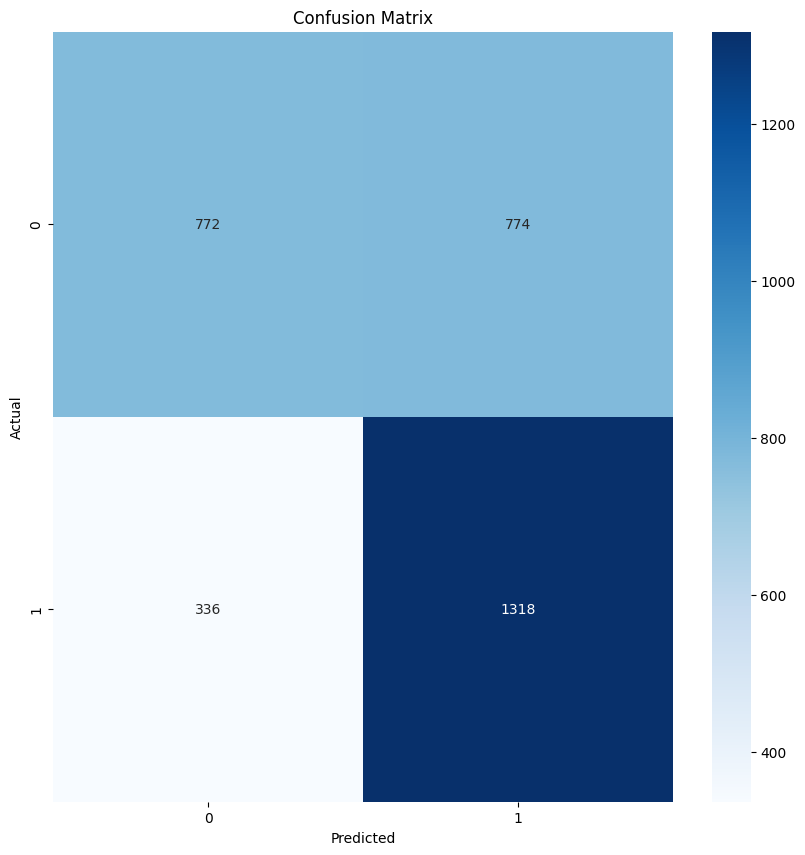

(tensor([[[ 5.60215406e+00, -3.17192488e+01,  1.07353164e+01],
          [-8.69308282e+00, -2.77274116e+00, -1.34377962e+01]],
 
         [[ 1.07472173e+01,  2.12731927e+01,  5.75414182e+00],
          [-7.69113269e+00, -5.90036713e+00, -4.38947527e-01]],
 
         [[ 5.77133207e+00, -1.96562352e+01,  1.78591271e+01],
          [-6.13139134e+00,  1.02439477e-01,  1.93680647e+01]],
 
         [[ 1.78520526e+01, -1.95572102e-01,  2.91344808e+00],
          [ 4.30354383e+00,  1.26688417e+01,  2.20818956e+00]],
 
         [[ 2.90227291e+00, -7.37974586e+00, -1.45315373e-02],
          [-3.72748552e-04,  5.27051606e-03, -9.94832876e-05]]], requires_grad=True),
 tensor(0.42305284, requires_grad=True),
 [tensor(1.966574, requires_grad=True),
  tensor(3.06606675, requires_grad=True),
  tensor(1.43728514, requires_grad=True),
  tensor(0.93706089, requires_grad=True),
  tensor(1.49728546, requires_grad=True),
  tensor(2.97683835, requires_grad=True),
  tensor(1.04172798, requires_grad=True),
  

In [2]:
qmlvcml.apply_model(banana_df_X, banana_df_y, steps=50,
                     batch_size_percent=.8, isPlot=True, isDebug=False,
                     dim_reduce_type='trimap')

/home/driffyn/anaconda3/envs/phys4684/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


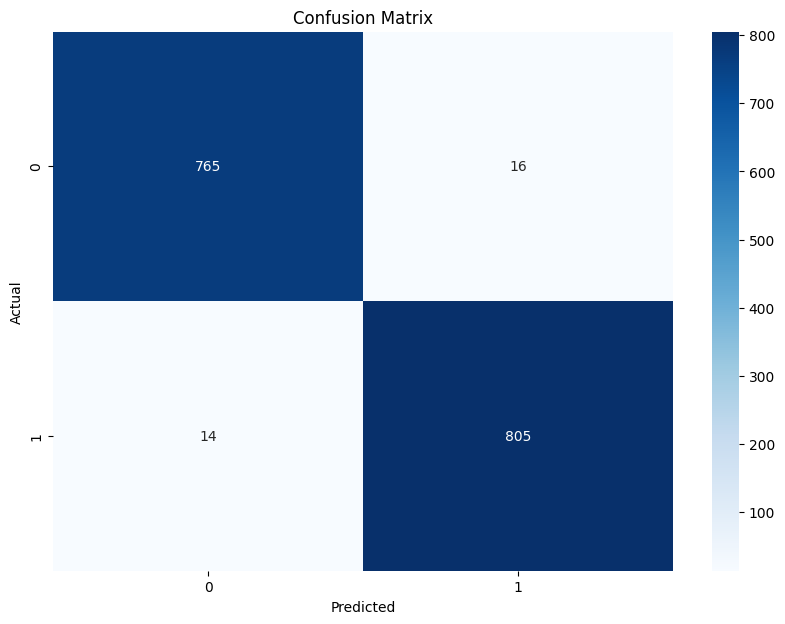

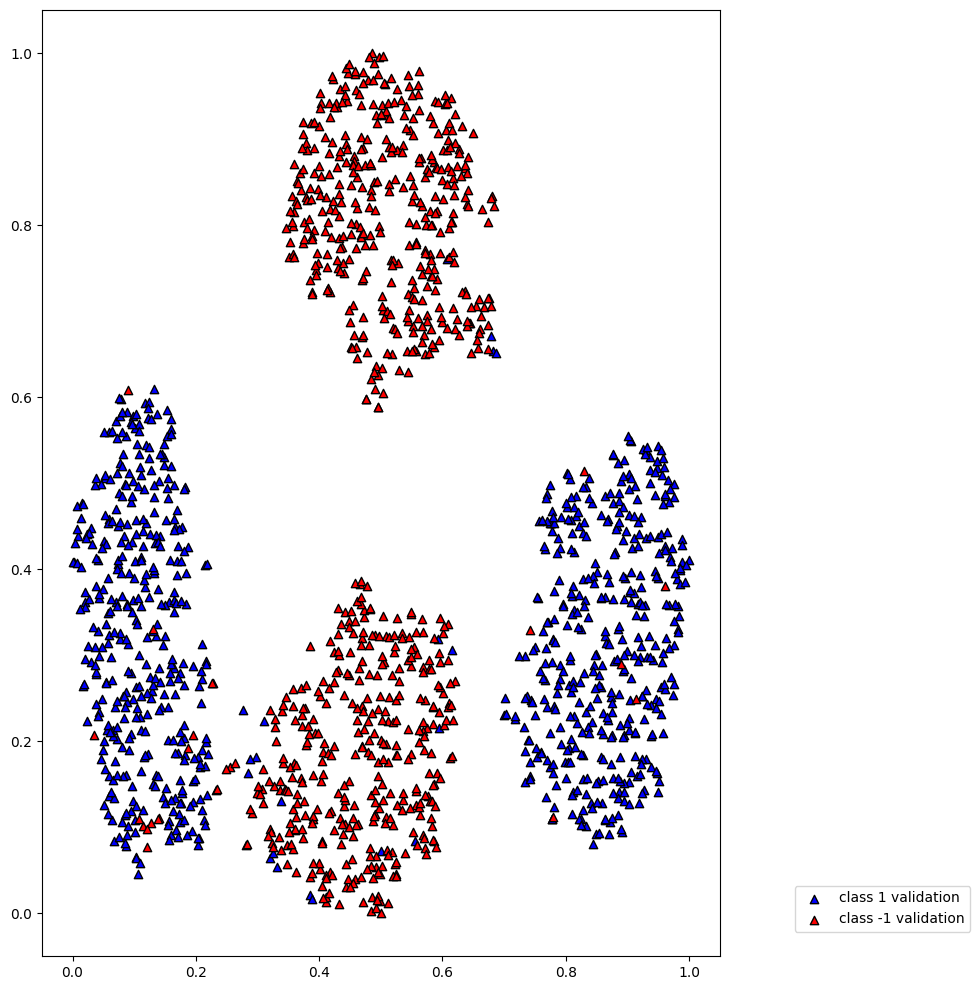

Accuracy: 0.98125


/home/driffyn/anaconda3/envs/phys4684/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [3]:
model, confusion = qmlvcml.apply_svm(banana_df, 'Quality', isPlot=True)